# knowledge domain
****************************
## About Dataset
### Context
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### Content
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains __500K__ rows and __8__ columns. The following is the description of each column.

+ TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
+ Date (numeric): the date when each transaction was generated.
+ ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
+ Product (categorical): product/item name.
+ Price (numeric): the price of each product per unit in pound sterling (£).
+ Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
+ CustomerNo (categorical): a five-digit unique number that defines each customer.
+ Country (categorical): name of the country where the customer resides.

## what is the question we want to answer it ?
### Analysis question
+ How was the sales trend over the months?
+ What are the most frequently purchased products?
+ How many products does the customer purchase in each transaction?
+ what is the most products is cancelled?
+ What is the most profitable month?
+ what is the most unprofitable month?
+ What are the most frequently purchased products( high price )?
+ What are the most frequently purchased products( low price )?
+ What is the name of the country that has the most sales?
+ What is the name of the country that has the most reutrn transaction?
+ How much does an average customer spend?



### visualize question
+ show the pie char for the most 5 price lead to get high profit?
+ show using bar char who the most 5 customer purchased products?
+ using pie char to show the Percentage of buyed and returned?
+ Who are the top 10 most loyal customers (based on number of transactions)?



prepare the library and model needed

In [27]:
import pandas as pan
import matplotlib.pyplot as mat
import statistics as t
import numpy as num
import datetime

__load data from CSV file using padas__

In [28]:
df=pan.read_csv("E-commerce.csv")
print(str(df))

       TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6     13069.0   
...

__now we print data we use the built in funcetion in pandas (info) to get more information about dataset__

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [30]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [31]:
df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


__remove duplicated data thare is no way can deal with duplicated data__
__the bast way is remove__

In [ ]:
print("number of coulmn duplicated  = ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.duplicated().sum()

number of coulmn duplicated  =  5200


np.int64(0)

we get the 55 miss value in customerNO cell

In [33]:
df.bfill(inplace=True)
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

__Edit the value in customerNO__

In [34]:
"""
we can use this funcetion
j=0
for i in df["CustomerNo]:
    df["CustomerNo][j]=str(i).strip()[:-2]

"""

def Edit(data):
    data=str(data).strip()[:-2]
    return data
df["CustomerNo"]=df["CustomerNo"].apply(Edit)
print(df)

       TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12      17490   
1       Christmas Star Wish List Chalkboard  10.65        36      13069   
2                  Storage Tin Vintage Leaf  11.53        12      13069   
3         Tree T-Light Holder Willie Winkie  10.65        12      13069   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6      13069   
...      

In [35]:
df["ProductName"]=df["ProductName"].str.title().str.strip()


In [36]:
df["Country"]=df["Country"].str.title().str.strip()

Edit the foramt of date using built in funcetion to_datetime in pandas


In [37]:
df["Date"]=pan.to_datetime(df["Date"])


# Featur engineer

create column called (type of Transaction)

In [38]:
def type_of_Transaction(data):
    if data>0:
        return "buy"
    elif data<0:
        return "return"
    else:
        return None    
df["type_of_Transaction"]=df["Quantity"].apply(type_of_Transaction)
print(df.head(5))


  TransactionNo       Date ProductNo                          ProductName  \
0        581482 2019-12-09     22485        Set Of 2 Wooden Market Crates   
1        581475 2019-12-09     22596  Christmas Star Wish List Chalkboard   
2        581475 2019-12-09     23235             Storage Tin Vintage Leaf   
3        581475 2019-12-09     23272    Tree T-Light Holder Willie Winkie   
4        581475 2019-12-09     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity CustomerNo         Country type_of_Transaction  
0  21.47        12      17490  United Kingdom                 buy  
1  10.65        36      13069  United Kingdom                 buy  
2  11.53        12      13069  United Kingdom                 buy  
3  10.65        12      13069  United Kingdom                 buy  
4  11.94         6      13069  United Kingdom                 buy  


__detect the outlier and solve it__

In [39]:
# use IQR to solve the outlier
Q1=df["Price"].quantile(0.25)
Q3=df["Price"].quantile(0.75)
IQR=Q3-Q1
lowerBand=Q1-(1.5*IQR)
upperBand=Q3+(1.5*IQR)

def Price_class(data):
    if data>upperBand:
        return "high"
    elif data<lowerBand:
        return "low"
    else:
        return "normal"
    
df["Price_class"]=df["Price"].apply(Price_class)

# Answer the question + visualization

+ How was the sales trend over the months?


January      3405988.90
February     4605702.03
March        6208570.13
April        3291955.62
May          3638085.05
June         4495987.99
July         4401861.55
August       4339649.36
September    4521865.67
October      7712836.31
November     6964999.33
December     6529256.45
Name: Sales, dtype: float64


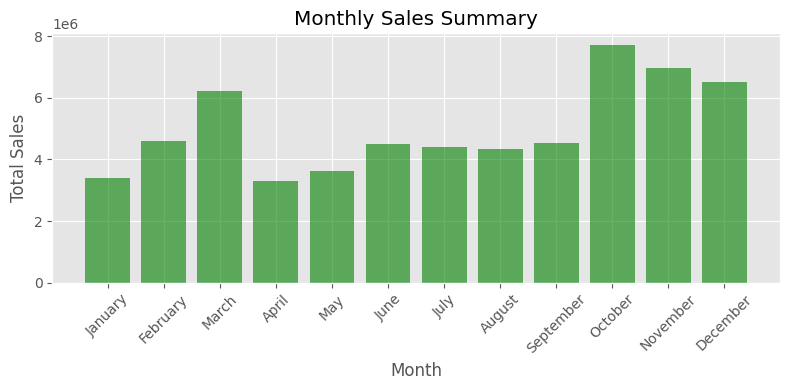

In [55]:
from calendar import month_name
month = list(month_name)[1:]
def get_month_name(date):
    date=datetime.datetime.date(date)
    return date.strftime("%B")

df["Sales"] = df["Price"] * df["Quantity"]
df["Month"] = df["Date"].apply(get_month_name)

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales.index=sorted(monthly_sales.index,key=month.index)
print(monthly_sales)
mat.figure(figsize=(8, 4))
mat.bar(monthly_sales.index, monthly_sales.values, color = "green" , alpha = 0.6)
mat.title("Monthly Sales Summary")
mat.xlabel("Month")
mat.ylabel("Total Sales")
mat.xticks(rotation=45)
mat.tight_layout()
mat.show()

____depending on the previous bar chart we can said the sales sometime is increase and another is decreased____
******************


+ What are the most frequently purchased products?


In [41]:
buy_products = df.loc[df["type_of_Transaction"] == "buy", "ProductName"]
most = t.mode(buy_products.values)
print(most)

Cream Hanging Heart T-Light Holder


__most frequently purchased products : Cream Hanging Heart T-Light Holder__
**********

+ How many products does the customer purchase in each transaction?


In [42]:
buy_transactions = df[df["type_of_Transaction"] == "buy"] 

unique_transactions = len(buy_transactions["TransactionNo"].unique())
total_transactions = len(buy_transactions["TransactionNo"])
print(f"Average items per transaction: {total_transactions//unique_transactions}")  




Average items per transaction: 26


__+ what is the most products cancelled?__


Regency Cakestand 3 Tier


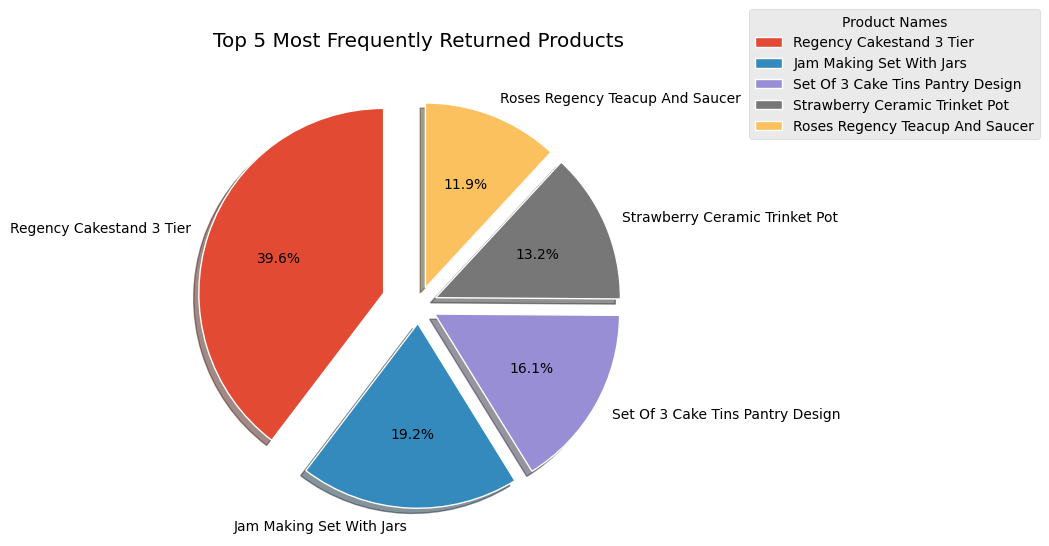

In [43]:
buy_transactions = df[df["type_of_Transaction"] == "return"] 
print(t.mode(buy_transactions["ProductName"]))
return_transactions = df[df["type_of_Transaction"] == "return"]
product_return_counts = return_transactions["ProductName"].value_counts()
data=product_return_counts[:5]
lable=["Regency Cakestand 3 Tier","Jam Making Set With Jars","Set Of 3 Cake Tins Pantry Design","Strawberry Ceramic Trinket Pot","Roses Regency Teacup And Saucer"]
mat.figure(figsize=(10, 6))
mat.pie(data, 
        labels=lable,
        autopct='%1.1f%%',  
        startangle=90,     
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        , explode=[0.2,0.1,0.1,0.1,0.1]
        , shadow=True
        )  

mat.title("Top 5 Most Frequently Returned Products", pad=20)
mat.legend(lable, 
           title="Product Names",
           loc="center left",
           bbox_to_anchor=(1.2, 1))
mat.show()

__+ What is the most profitable month?__

Month
April        3405988.90
August       4605702.03
December     6208570.13
February     3291955.62
January      3638085.05
July         4495987.99
June         4401861.55
March        4339649.36
May          4521865.67
November     7712836.31
October      6964999.33
September    6529256.45
Name: Sales, dtype: float64


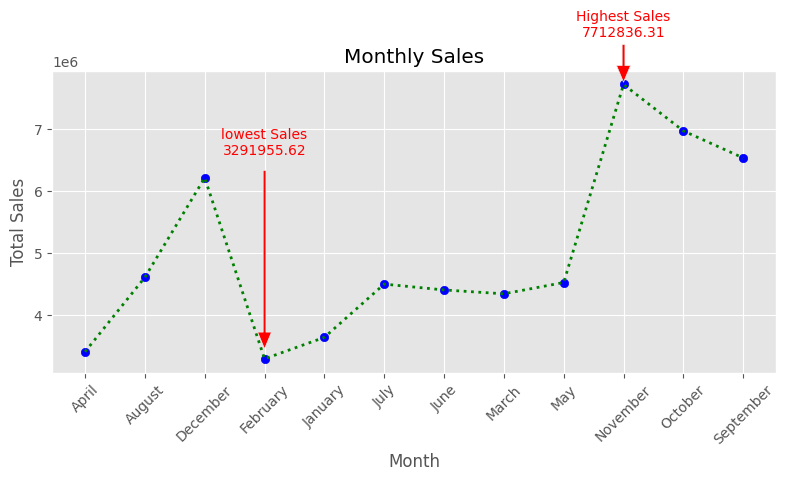

In [44]:

data = df.groupby("Month")["Sales"].sum()
print(data)
max_month = data.idxmax()
max_value = data.max()
min_month = data.idxmin()
min_value = data.min()
mat.figure(figsize=(8, 5))
mat.plot(data.index, data.values, color='g', linewidth=2, label='Sales Line' , linestyle=":")
mat.scatter(data.index, data.values, color='blue', marker='o')
mat.annotate(
    f'Highest Sales\n{max_value}', 
    xy=(max_month, max_value),       
    xytext=(max_month, max_value + max(data.values)*0.1), 
    arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
    ha='center',
    fontsize=10,
    color='red'
)

mat.annotate(
    f'lowest Sales\n{min_value}', 
    xy=(min_month, min_value),       
    xytext=(min_month, min_value + min(data.values)), 
    arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
    ha='center',
    fontsize=10,
    color='red'
)

mat.style.use("ggplot")
mat.grid(True)
mat.xticks(rotation=45)
mat.xlabel("Month")
mat.ylabel("Total Sales")
mat.title("Monthly Sales")
mat.tight_layout()
mat.show()



In [45]:
data = df[df["Price_class"] == "high"]
most = t.mode(data=data["ProductName"])
print("the most product payed in high class : "+most)
data = df[df["Price_class"] == "low"]
most = t.mode(data=data["ProductName"])
print("the most product payed in high low : "+most)

the most product payed in high class : Regency Cakestand 3 Tier
the most product payed in high low : Jumbo Bag Red Retrospot


+ What is the name of the country that has the most sales?


Country
United Kingdom    472717
France             10377
Germany            10221
Eire                7783
Belgium             2507
Name: count, dtype: int64


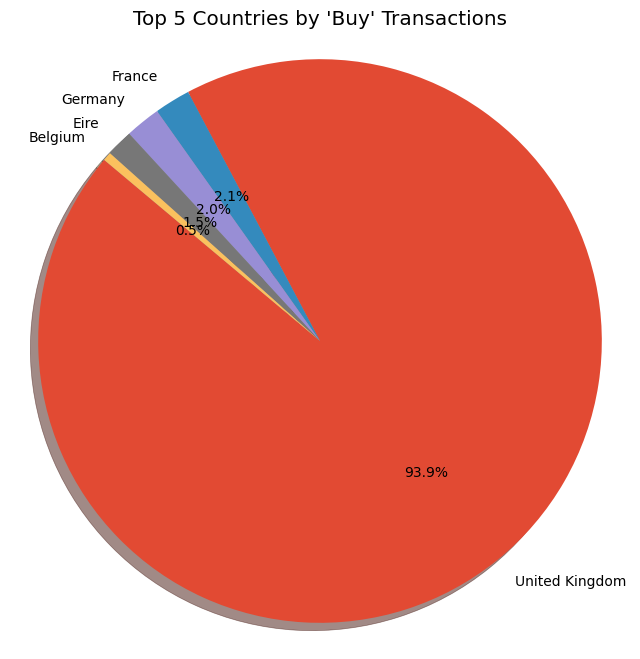

In [46]:

data = df[df["type_of_Transaction"] == "buy"]
data = data["Country"].value_counts()[:5]
print(data)
labels = data.index
mat.figure(figsize=(8, 8))
mat.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
mat.title("Top 5 Countries by 'Buy' Transactions")
mat.axis("equal")  
mat.show()



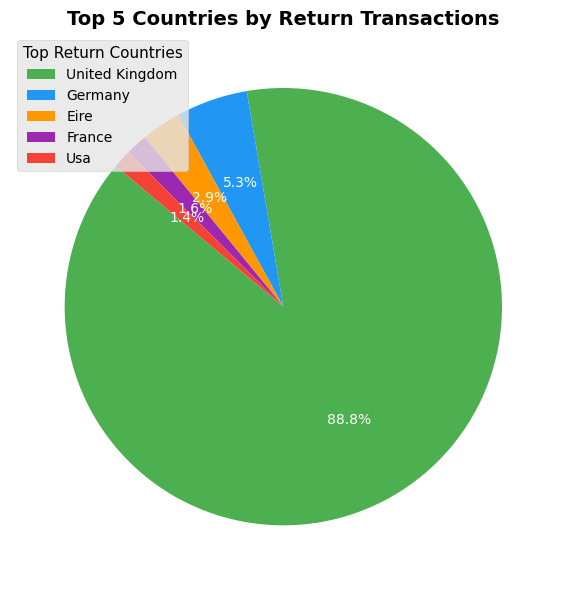

In [47]:
data = df[df["type_of_Transaction"] == "return"]
data = data["Country"].value_counts()[:5]
labels = data.index.tolist()

colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#F44336']

mat.figure(figsize=(8, 6))
wedges, texts, autotexts = mat.pie(
    data, 
    labels=labels,
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops={'color': "white", 'fontsize': 10}
)

legend = mat.legend(
    wedges, labels,
    title="Top Return Countries",
    loc='upper left',
    fontsize=10,
    title_fontsize=11,
    frameon=True
)

mat.title("Top 5 Countries by Return Transactions", fontsize=14, weight='bold')
mat.tight_layout()
mat.show()

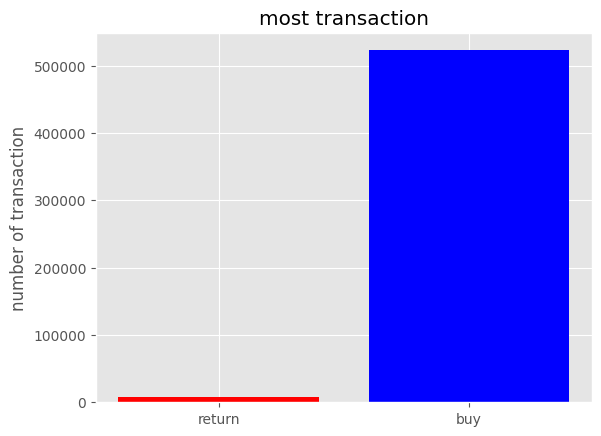

In [48]:
NO_OF_Buy=len(df[df["type_of_Transaction"]=="buy"])
NO_OF_return=len(df[df["type_of_Transaction"]=="return"])
data=[NO_OF_return,NO_OF_Buy]
mat.bar(["return" , "buy"],data , color=["red","blue"])
mat.ylabel("number of transaction")

mat.title("most transaction")
mat.show()

+  Who are the top 10 most loyal customers (based on number of transactions)?


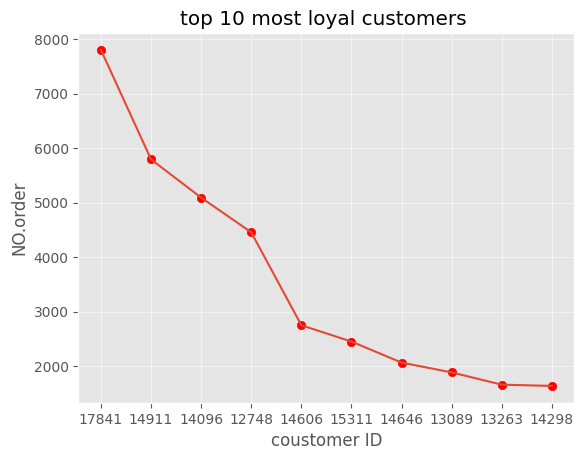

In [49]:
data=df[df["type_of_Transaction"]=="buy"]
data=df["type_of_Transaction"].unique()
data = df["CustomerNo"].value_counts()[:10]
mat.ylabel("NO.order")
mat.xlabel("coustomer ID")
mat.plot(data.index,data.values)
mat.title("top 10 most loyal customers ")
mat.scatter(data.index,data.values , marker="o" ,color = "r")
mat.grid(True , alpha = 0.5)


+ mean of the customer spend

In [50]:
Q1=df["Sales"].quantile(0.25)
Q3=df["Sales"].quantile(0.75)
IQR=Q3-Q1
lowerBand=Q1-(1.5*IQR)
upperBand=Q3+(1.5*IQR)
data = df[(df["Sales"] > lowerBand) & (df["Sales"] < upperBand)]
print("mean after remove outlier = ", int(data["Sales"].mean()))
print("mean after before outlier = ", int(df["Sales"].mean()))

mean after remove outlier =  62
mean after before outlier =  113


In [51]:
import plotly.express as px

# Filter for return transactions
data = df[df["type_of_Transaction"] == "return"]

# Group and count top 5 countries
country_counts = data["Country"].value_counts().nlargest(5).reset_index()
country_counts.columns = ["Country", "Transaction Count"]

# Create interactive pie chart
fig = px.pie(
    country_counts,
    names="Country",
    values="Transaction Count",
    title="Top 5 Countries by Return Transactions",
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Customize layout (optional)
fig.update_traces(textinfo='percent+label', pull=[0.05]*5, hole=0.4)
fig.update_layout(
    title_font_size=18,
    legend_title_text='Country',
    legend=dict(
        orientation="v",
        x=0.8,
        y=1.0
    )
)

fig.show()


In [52]:

# Filter for return transactions
data = df

# Group and count by country
country_counts = data["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Transaction Count"]

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",  # Accepts full country names
    color="Transaction Count",
    color_continuous_scale="Blues",
    title="Transactions by Country (2D Earth View)",
)

# Customize appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'  # 2D Earth-like projection
    ),
    title_font_size=20
)

fig.show()
